# Oscilador amortiguado perturbado en t=0

[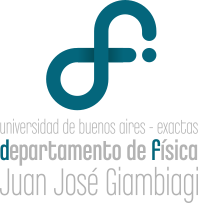](https://www.df.uba.ar/)

[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

---

## Enunciado
![imagen.png](figuras/enunciado.png)

## El sistema

Entiendo que se trata de un oscilador unidimensional con amortiguamiento proporcional con la velocidad.
$$
\begin{aligned}
m \ddot{x} &= - c \dot{x} - k x\\
m \ddot{x} &+ c \dot{x} + k x = 0\\
\ddot{x} & + \frac{c}{m} \dot{x} + \frac{k}{m} x = 0\\
\ddot{x} & + \Gamma \dot{x} + \omega_0 x = 0\\
\end{aligned}
$$

La solución general es
$$
x = C_1 \operatorname{e}^{\frac{1}{2} \left( -\Gamma - \sqrt{\Gamma^2 - 4 \omega_0^2} \right) t} + C_2 \operatorname{e}^{\frac{1}{2} \left( -\Gamma + \sqrt{\Gamma^2 - 4 \omega_0^2} \right) t}\\
x = \operatorname{e}^{-\frac{\Gamma}{2}} \left( C_1 \operatorname{e}^{\frac{1}{2} \left(- \sqrt{\Gamma^2 - 4 \omega_0^2} \right) t} + C_2 \operatorname{e}^{\frac{1}{2} \left(\sqrt{\Gamma^2 - 4 \omega_0^2} \right) t} \right)
$$

Es el caso sub-amortiguado, $\Gamma^2 < 4 \omega_0^2$, el que tiene una solución oscilante que se asemeja a la del enunciado
$$
x = \operatorname{e}^{-\frac{\Gamma}{2} t} \left(
A \cos {\left( \left( \sqrt{\omega_0^2 - \frac{\Gamma^2}{4}} \right) t \right)} 
+ B \sin {\left( \left( \sqrt{\omega_0^2 - \frac{\Gamma^2}{4}} \right) t \right)} 
\right) \\
x = \operatorname{e}^{-\frac{\Gamma}{2} t} \left(
A \cos {\left( \omega  t \right)} 
+ B \sin {\left( \omega  t \right)} 
\right) \\
$$
En $t=0$ es apartado de su posición de equilibrio en una distancia $\psi_0$ y soltado desde allí.
$$
\psi(0) = \psi_0\\
\dot{\psi}(0) = 0
$$
La condición de la velocidad hace que $B= 0$ y la de la posicíón que $A= \psi_0$, recuperando así la solución del enunciado en que se usa $\gamma = \frac{\Gamma}{2}$ y $\omega_0 = \omega$.

Y si bien es claro que hay una única frecuencia en la expresión de $x(t)$, esta es $\omega = \sqrt{\omega_0^2 - \frac{\Gamma^2}{4}}$, como su amplitud se reduce en $\operatorname{e}^{-\frac{\Gamma}{2} t}$ no basta una única armónica con $\omega$ para describir $\psi(t)$ en $t>0$.

## Espectro de $\psi(t)$

Para no confundir $\omega$ variable en la que describiremos el espectro, $\hat{\psi}(\omega)$, con la de la oscilación del sistema llamaremos a esta última como en el enunciado $\omega_0$.

In [1]:
import sympy as sym
from sympy.physics import mechanics as mech
# mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [2]:
t= sym.symbols('t', real= True)
omega_0, psi_0, gamma = sym.symbols('omega_0, psi_0, gamma', real=True)
psi_t = sym.Eq(sym.Function('\psi')(t),
               sym.Piecewise(
                   (psi_0* sym.exp(- gamma* t)* sym.cos(omega_0* t), t>0),
                   (0, True) 
               )
              )
psi_t

Eq(\psi(t), Piecewise((psi_0*exp(-gamma*t)*cos(omega_0*t), t > 0), (0, True)))

Obtendremos el espectro $\hat{\psi}(\omega) = \mathcal{F} \psi(t) = \int_{-\infty}^\infty \psi(t) \operatorname{e}^{i \omega t} \mathrm{d} t$.

Facilita mucho descomponer la función trigonométrica en exponenciales usando la fórmula de Euler.

In [3]:
omega = sym.Symbol('omega', real= True)
sym.Eq(sym.cos(omega* t), sym.cos(omega* t).rewrite(sym.exp) )

Eq(cos(omega*t), exp(I*omega*t)/2 + exp(-I*omega*t)/2)

In [4]:
psi_t_Euler = psi_t.rewrite(sym.exp).expand()
psi_t_Euler

Eq(\psi(t), Piecewise((psi_0*exp(-gamma*t)*exp(I*omega_0*t)/2 + psi_0*exp(-gamma*t)*exp(-I*omega_0*t)/2, t > 0), (0, True)))

In [5]:
sym.Eq(sym.Function('\hat{\psi}')(omega), 
       sym.Integral(psi_t_Euler.rhs.args[0][0]* sym.exp(-sym.I* omega* t), (t,0, sym.oo) )
      )

Eq(\hat{\psi}(omega), Integral((psi_0*exp(-gamma*t)*exp(I*omega_0*t)/2 + psi_0*exp(-gamma*t)*exp(-I*omega_0*t)/2)*exp(-I*omega*t), (t, 0, oo)))

Resolvemos el primer término de la suma

In [6]:
erste= sym.Integral(psi_t_Euler.rhs.args[0][0].args[0]* sym.exp(-sym.I* omega* t), (t,0, sym.oo) )
erste

Integral(psi_0*exp(-gamma*t)*exp(-I*omega*t)*exp(I*omega_0*t)/2, (t, 0, oo))

In [7]:
erste.doit()

Piecewise((psi_0/(2*gamma*(1 + I*omega/gamma)*(1 - I*omega_0/(gamma*(1 + I*omega/gamma)))), ((Abs(arg(omega_0) - pi/2) <= pi/2) & (Abs(arg(gamma) + arg(1 - omega*exp_polar(-I*pi/2)/gamma)) < pi/2)) | ((Abs(arg(omega_0) - pi/2) < pi/2) & (Abs(arg(gamma) + arg(1 - omega*exp_polar(-I*pi/2)/gamma)) <= pi/2)) | ((Abs(arg(omega_0) - pi/2) < pi/2) & (Abs(arg(gamma) + arg(1 - omega*exp_polar(-I*pi/2)/gamma)) < pi/2))), (Integral(psi_0*exp(-gamma*t)*exp(-I*omega*t)*exp(I*omega_0*t)/2, (t, 0, oo)), True))

Ídem. el segundo

In [8]:
zweite= sym.Integral(psi_t_Euler.rhs.args[0][0].args[1]* sym.exp(-sym.I* omega* t), (t,0, sym.oo) )
zweite.doit()

Piecewise((psi_0/(2*gamma*(1 + I*omega/gamma)*(1 + I*omega_0/(gamma*(1 + I*omega/gamma)))), ((Abs(arg(omega_0) + pi/2) <= pi/2) & (Abs(arg(gamma) + arg(1 - omega*exp_polar(-I*pi/2)/gamma)) < pi/2)) | ((Abs(arg(omega_0) + pi/2) < pi/2) & (Abs(arg(gamma) + arg(1 - omega*exp_polar(-I*pi/2)/gamma)) <= pi/2)) | ((Abs(arg(omega_0) + pi/2) < pi/2) & (Abs(arg(gamma) + arg(1 - omega*exp_polar(-I*pi/2)/gamma)) < pi/2))), (Integral(psi_0*exp(-gamma*t)*exp(-I*omega*t)*exp(-I*omega_0*t)/2, (t, 0, oo)), True))

In [9]:
sym.Eq(sym.Function('\hat{\psi}')(omega), 
                   erste.doit().args[0][0].simplify() + zweite.doit().args[0][0].simplify()
      )


Eq(\hat{\psi}(omega), psi_0/(2*(gamma + I*omega + I*omega_0)) + psi_0/(2*(gamma + I*omega - I*omega_0)))

In [10]:
psi_omega = sym.Eq(sym.Function('\hat{\psi}')(omega), 
                   (erste.doit().args[0][0] + zweite.doit().args[0][0] ).expand().simplify()
                  )
psi_omega

Eq(\hat{\psi}(omega), psi_0*(gamma + I*omega)/(gamma**2 + 2*I*gamma*omega - omega**2 + omega_0**2))

## Gráfico $|\hat{\psi}(\omega)|^2$

In [22]:
psi_omega_modSqr = sym.Eq(sym.Function('|\hat{\psi}|^2')(omega), psi_omega_squared.expand().simplify() )
psi_omega_modSqr

Eq(|\hat{\psi}|^2(omega), psi_0**2*(gamma**2 + omega**2)/(gamma**4 + 2*gamma**2*omega**2 + 2*gamma**2*omega_0**2 + omega**4 - 2*omega**2*omega_0**2 + omega_0**4))

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.style import use as meGusta
meGusta('fivethirtyeight') # estilo de gráficos con grilla y letras grandes

In [12]:
k= 10 # [N m-1]
m = 1 # [kg]
c = 5 # [N m-1 s-2]
gamma_magnitud = 0.5* c/ m
omega_0_magnitud = np.sqrt( (k/m)**2 - (gamma_magnitud/2)**2 )
magnitudes = {
    psi_0 : 1,
    gamma : gamma_magnitud,
    omega_0 : omega_0_magnitud,
}
(gamma_magnitud< 2* omega_0_magnitud) # ¿Es con estas magnitudes sub-amortiguado?

True

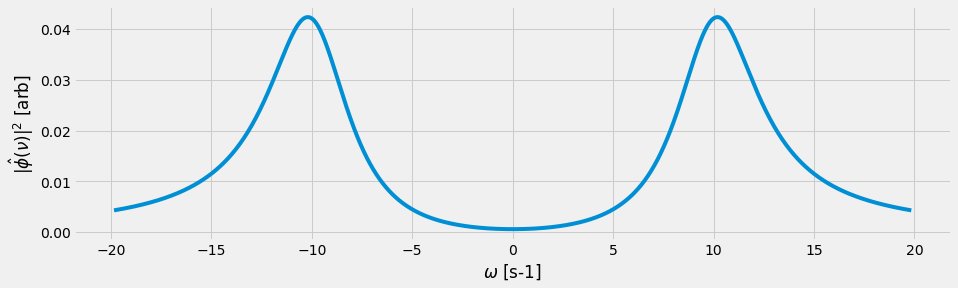

In [13]:
psi_omega_squared= psi_omega.rhs* psi_omega.rhs.conjugate()
psi_omega_squared_magnitudes = psi_omega_squared.subs(magnitudes)
psi_omega_squared_magnitudes_lambdify = sym.lambdify(omega, psi_omega_squared_magnitudes)
nus = np.linspace(-2* omega_0_magnitud, 2* omega_0_magnitud, num= int(1E3) )
fig, ax = plt.subplots(figsize=(14,4) )
ax.set_xlabel(r'$\omega$ [s-1]')
ax.set_ylabel(r'$|\hat{\phi}(\nu)|^2$ [arb]')
ax.plot(nus, psi_omega_squared_magnitudes_lambdify(nus))

El aumentar $c$, ergo $\Gamma$, aumenta el ancho de los picos espectrales.
Es interesante graficar varios casos cambiando la magnitud para $c$.

### Frecuencias negativas en el espectro
Me gustó la respuesta que encontré en 
https://dsp.stackexchange.com/questions/431/what-is-the-physical-significance-of-negative-frequencies

Esencialmente con la transformada no estamos proyectando directamente en una base de armónicos expresados como  senos y/o cosenos, sino en exponenciales complejas (al menos con la formulación usual).
Como proyectamos una señal real en $t$ siempre obtendremos dos exponenciales complejas imaginarias de igual amplitud de forma tal que cuando se combinen sus partes imaginarias se cancelen y se vuelva a obtener la armónica (o muchas de ellas) que reconstruyen la señal real.

### Máximo y ancho de los picos en el espectro

Antes de graficar hubiera apostado dinero a que el máximo estaría en $\omega = \sqrt{\omega_0^2 - \left(\frac{\Gamma}{2} \right)^2  }$, que aún para un valor relativamente elevado de $\Gamma$ frente $\omega_0$ es bastante próxima a esta última.

In [14]:
k/m, gamma_magnitud, omega_0_magnitud

(10.0, 2.5, 9.921567416492215)

Me parece una **piolada** (sic) de quién hizo este enunciado la sugerencia
> (puede considerar sólo las contribuciones relevante de $\mathcal{F}[\psi]$ a lo largo de este intervalo) 

Así por ejemplo podría _sacarme de encima_ $\gamma$ y listo el pollo...  para el máximo, pero nada me dice del ancho si elimino $\gamma$.

In [23]:
psi_omega_modSqr

Eq(|\hat{\psi}|^2(omega), psi_0**2*(gamma**2 + omega**2)/(gamma**4 + 2*gamma**2*omega**2 + 2*gamma**2*omega_0**2 + omega**4 - 2*omega**2*omega_0**2 + omega_0**4))

Se reduciría a

In [16]:
psi_omega_modSqr_lesser = psi_omega_modSqr.subs(gamma,0)
psi_omega_modSqr_lesser

Eq(|\hat{\psi}|^2(omega), omega**2*psi_0**2/(omega**4 - 2*omega**2*omega_0**2 + omega_0**4))

con máximo en $\omega_0$

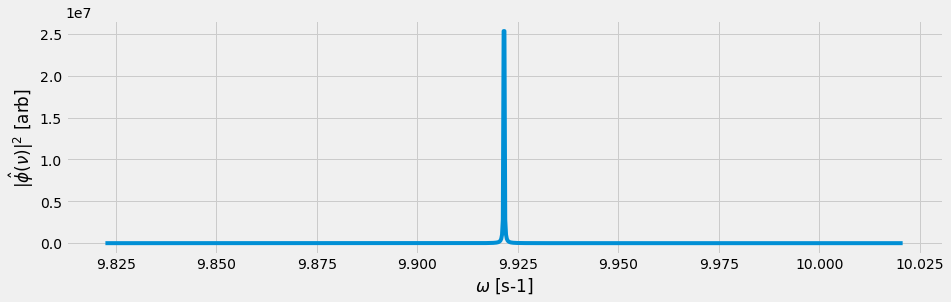

In [26]:
psi_omega_squared_lesser_magnitudes = psi_omega_modSqr_lesser.rhs.subs(magnitudes)
psi_omega_squared_lesser_magnitudes_lambdify = sym.lambdify(omega, psi_omega_squared_lesser_magnitudes)
nus_lesser = np.linspace(0.99* omega_0_magnitud, 1.01* omega_0_magnitud, num= int(1E3) )
fig, ax = plt.subplots(figsize=(14,4) )
ax.set_xlabel(r'$\omega$ [s-1]')
ax.set_ylabel(r'$|\hat{\phi}(\nu)|^2$ [arb]')
ax.plot(nus_lesser, psi_omega_squared_lesser_magnitudes_lambdify(nus_lesser))

### Buscando una solución analítica al problema del máximo y ancho

Para responder correctamente a las interrogantes de en que $\omega$ está el máximo y cual es el ancho de banda definido como ancho a media altura de tales máximos tenemos que analizar la expresión

Derivar respecto a $\omega$, igualar tal derivada a cero no da una familia de  posibles condiciones entre $\gamma$, $\omega_0$ y $\omega$.

In [18]:
max_cond = sym.solve(psi_omega_modSqr.rhs.diff(omega), omega ) # 
max_cond

[0,
 -sqrt(-gamma**2 - omega_0*sqrt(4*gamma**2 + omega_0**2)),
 sqrt(-gamma**2 - omega_0*sqrt(4*gamma**2 + omega_0**2)),
 -sqrt(-gamma**2 + omega_0*sqrt(4*gamma**2 + omega_0**2)),
 sqrt(-gamma**2 + omega_0*sqrt(4*gamma**2 + omega_0**2))]

De estas la única con sentido físico es

In [19]:
omega_max = max_cond[4]
omega_max

sqrt(-gamma**2 + omega_0*sqrt(4*gamma**2 + omega_0**2))

In [20]:
psi_omega_modSqr.subs(omega, omega_max).simplify()

Eq(|\hat{\psi}|^2(sqrt(-gamma**2 + omega_0*sqrt(4*gamma**2 + omega_0**2))), psi_0**2*sqrt(4*gamma**2 + omega_0**2)/(2*omega_0*(4*gamma**2 + omega_0**2 - omega_0*sqrt(4*gamma**2 + omega_0**2))))

In [21]:
psi_omega_modSqr.subs(omega, omega_max).rhs.subs(magnitudes) # el máximo coincide con el de la gráfica

0.0423961447929616

Pero ya en este punto dudo que esto es lo que buscaba que resolvieran en un parcial quien escribió el enunciado de este problema.